## Visualization of Mexico dynamic model
### D. Li, 1.1.2021

In [1]:
# initialize and load modules
%matplotlib notebook
from pythonXdmfReader.pythonXdmfReader import*
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pyproj
import scipy.io as sio
from scipy import spatial
from cmcrameri import cm
from scipy.io import netcdf_file as netcdf

import matplotlib 
matplotlib.rc('xtick', labelsize=9) 
matplotlib.rc('ytick', labelsize=9)

print('module loaded')

module loaded


In [2]:
# set projection
myproj = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
lla = pyproj.Proj(proj='utm',zone='11N',ellps='WGS84', datum='WGS84')

# load geological data
trench = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/trench.txt')
epi = np.loadtxt('/import/schreck-data/dli/Mexico/Launch_Seissol/smallslab/2014EQ/2014Eq_USGS.txt')
aft = np.loadtxt('/import/schreck-data/dli/Mexico/Launch_Seissol/smallslab/2014EQ/2014Eq_aftershock.txt')

c5 = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/contour5.txt')
c20 = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/contour20.txt')
c40 = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/contour40.txt')
c60 = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/contour60.txt')
c80 = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/contour80.txt')

coastf = '/import/deadlock-data/dli/Mexico/TriSSE/model_coarse/Contour/guerrero.mat'
coast = sio.loadmat(coastf)
# ncst = pyproj.transform(lla, myproj, coast['ncst'][:,0],coast['ncst'][:,1],coast['ncst'][:,0], radians=False)
refer =  pyproj.transform(myproj,lla, -101,18,0, radians=False)
# print(refer[0],refer[1])
# tchxyz = pyproj.transform(lla, myproj, trench[:,0],trench[:,1],trench[:,2], radians=False)
# xtrch = tchxyz[0]/1000 - refer[0]/1000
# ytrch = tchxyz[1]/1000 - refer[1]/1000

folder = '/import/deadlock-data/dli/Mexico/TriSSE/model_coarse/'
coslp = netcdf(folder + '../Gaulandi/coslp2.grd','r').variables['z'][::1];
cox = netcdf(folder + '../Gaulandi/coslp2.grd','r').variables['lon'][::1];
coy = netcdf(folder + '../Gaulandi/coslp2.grd','r').variables['lat'][::1];
X,Y = np.meshgrid(cox,coy)
# coxyz = pyproj.transform(lla, myproj, X,Y,X, radians=False)
# xco = coxyz[0]/1e3-refer[0]/1e3
# yco = coxyz[1]/1e3-refer[1]/1e3

# epixyz = pyproj.transform(lla, myproj, epi[:,0],epi[:,1],epi[:,2], radians=False)
# aftxyz = pyproj.transform(lla, myproj, aft[:,0],aft[:,1],aft[:,2], radians=False)

# xepi = epixyz[0][0]/1e3-refer[0]/1e3
# yepi = epixyz[1][0]/1e3-refer[1]/1e3

# print(xepi*1e3,yepi*1e3)

# xaft = aftxyz[0]/1e3-refer[0]/1e3
# yaft = aftxyz[1]/1e3-refer[1]/1e3
   
# coastline projected
# ncstx = ncst[0]-refer[0]
# ncsty = ncst[1]-refer[1]
print('coastlines loaded')

coastlines loaded


<ipython-input-2-e967e591f1ed>:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  refer =  pyproj.transform(myproj,lla, -101,18,0, radians=False)
/home/dli/anaconda3/lib/python3.8/site-packages/scipy/io/netcdf.py:308: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  warnings.warn((


In [95]:
# setup folder and model
folder = '/import/freenas-m-05-seissol/dli/Mexico/lockingmodel3/'
# model name
modelname = 'f519L'
print('model = '+ modelname)

model = f519L


<IPython.core.display.Javascript object>


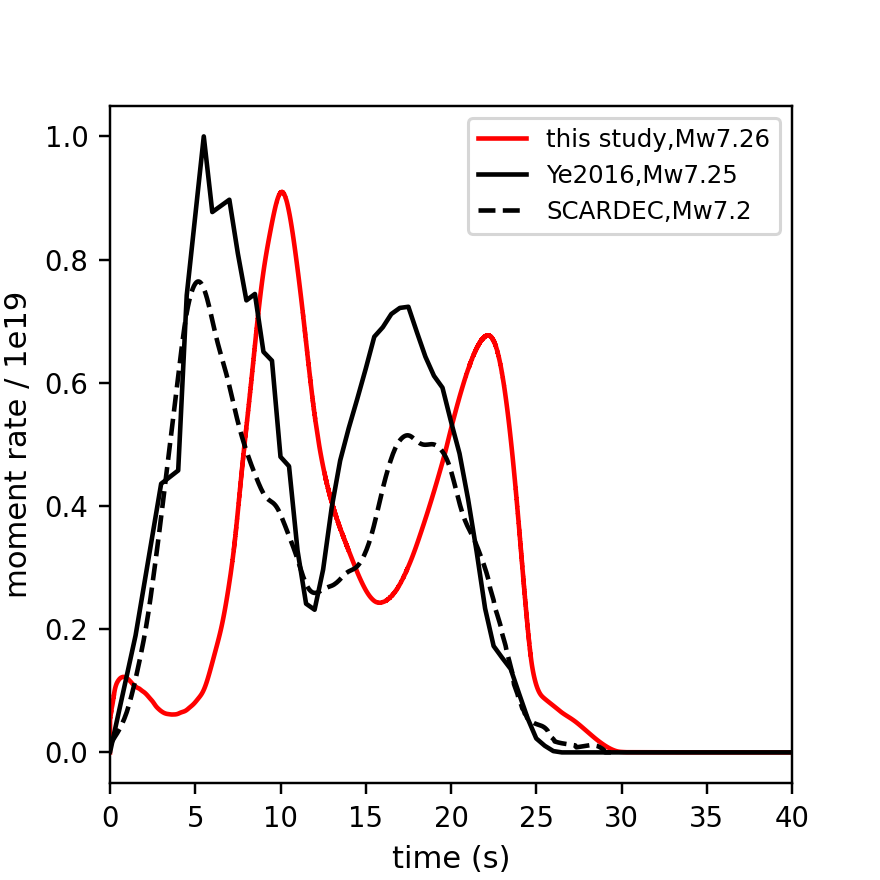

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [75]:
# plot Moment rate
# load teleseismic inversion data
#mfile = '/import/schreck-data/dli/Mexico/Launch_Seissol/smallslab/20140418_Guerrero.dat'
mfile1 = './20140418_Guerrero.dat'
mfile2 = 'Inversion/FCTs_20140418_142724_GUERRERO__MEXICO/fctmoysource'
fin1 = open(mfile1,'r');
fin2 = open(mfile2,'r')
mr1 = np.loadtxt(fin1,skiprows=2)
mr2 = np.loadtxt(fin2,skiprows=2);

fin = open(folder + modelname + '-EnF_0t-all.dat','r')
enf = np.loadtxt(fin,comments='#',skiprows=1)

# seismic moment magnitude
moment0 = 0.0
M0 = np.trapz(enf[:,1], x=enf[:,0])
mag  = 2/3*np.log10(M0)-6.07

###### 
fig = plt.figure(figsize=(4,4))
plt.plot(enf[:,0],enf[:,1]*1e7/1e26,'-r',label='this study,Mw'+str(round(mag,2)))   # from MPa*m**2/s to dyne-cm/s
plt.plot(mr1[:,0]-10.0,mr1[:,1],'-k',label='Ye2016,Mw7.25')
plt.plot(mr2[:,0],mr2[:,1]/1e19,'--k',label='SCARDEC,Mw7.2')

plt.legend(fontsize=8,loc='upper right')
plt.xlabel('time (s)')
plt.ylabel('moment rate / 1e19')
plt.xlim([0,40])
#plt.title('Mw:'+str(round(mag,2)))

plt.savefig(modelname+'-mag.eps',dpi=100)
plt.show()

In [96]:
# load data
xdmfFilename = folder + modelname + '-fault.xdmf'
#xdmfFilename ='/import/freenas-m-05-seissol/dli/Mexico/shallowpatch/'+modelname+'-fault.xdmf'

ndt = ReadNdt(xdmfFilename)
faultxyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

faultlonglat = pyproj.transform(lla, myproj, faultxyz[:,0]+refer[0],faultxyz[:,1]+refer[1],faultxyz[:,2], radians=False)


############# load fault output data  ##############
triang = tri.Triangulation(faultlonglat[0],faultlonglat[1],connect)

##%%
td0 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
ts0 = LoadData(xdmfFilename,'Ts0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
pn0 = LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
mud0 =LoadData(xdmfFilename,'Mud',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)

asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
vr = LoadData(xdmfFilename,'Vr',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
td = LoadData(xdmfFilename,'T_d',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)

index= np.where(asl[0]>0.5)
t_ave = np.mean(td[0][index])/1e6

print(round(t_ave,2))

R0  = -(td0[0])/pn0[0]
R   = R0 - mud0[0]
#cfs = (td0[0] + 0.44* pn0[0])
#s   = cfs/(-mud0[0]*pn0[0]+0.2*pn0[0])

tau = np.sqrt(td0[0]*td0[0] + ts0[0]*ts0[0])
S   = (-mud0[0]*pn0[0]-tau) /(tau + 0.2*pn0[0])

print(ndt)
np.max(S)
# print(faultlonglat[0],faultlonglat[1])

<ipython-input-96-1b4f85dd35c4>:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  faultlonglat = pyproj.transform(lla, myproj, faultxyz[:,0]+refer[0],faultxyz[:,1]+refer[1],faultxyz[:,2], radians=False)


-3.36
61


15061.671050828163

<IPython.core.display.Javascript object>


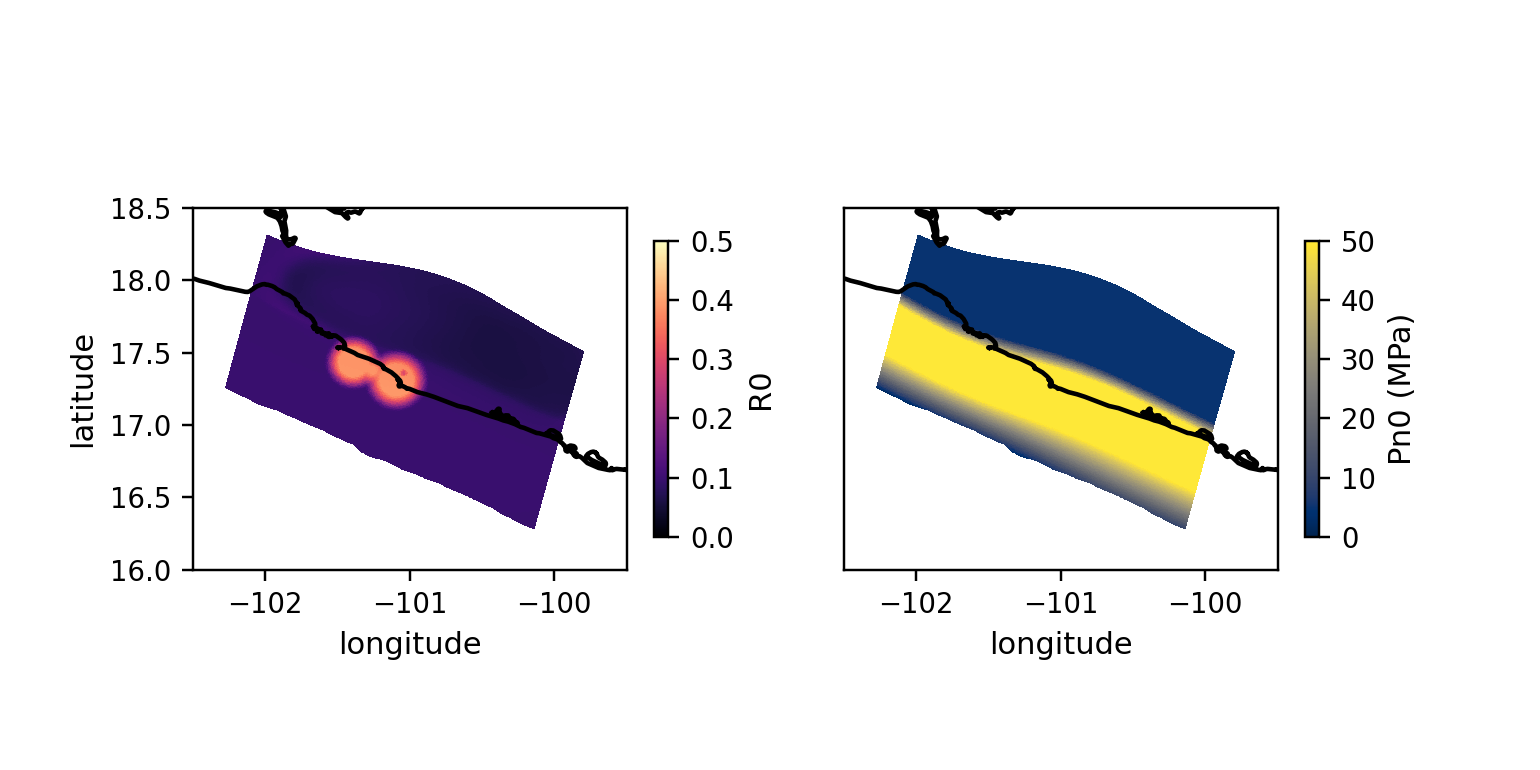

In [82]:
# plot parameters CFS and Pn0
fig,([ax0,ax1]) = plt.subplots(nrows=1,ncols=2,figsize=(7,3.5))

sc = ax1.tripcolor(triang,-pn0[0]/1e6,cmap='cividis',shading='flat',vmin=0,vmax=50)
cl = fig.colorbar(sc,ax=ax1,shrink=0.5)
cl.set_label('Pn0 (MPa)')

ax1.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
ax1.axes.yaxis.set_ticks([])
ax1.set_aspect(1)
ax1.set_xlabel('longitude')
# ax1.set_ylabel('y (km)')

sc = ax0.tripcolor(triang,R0,cmap='magma',shading='flat',vmin=0.0,vmax=0.5)
cl = fig.colorbar(sc,ax=ax0,shrink=0.5)
cl.set_label('R0')

ax0.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[12,16],colors='w')
ax0.set_aspect(1)
ax0.set_xlabel('longitude')
ax0.set_ylabel('latitude')

# ax0.plot(epi[:,0],epi[:,1],'*k',markersize=5)
# ax0.plot(aft[:,0],aft[:,1],'*b',markersize=4)

plt.show()
outname = modelname+'-para.png'
plt.savefig(outname,dpi=200,transparent=False)

<IPython.core.display.Javascript object>


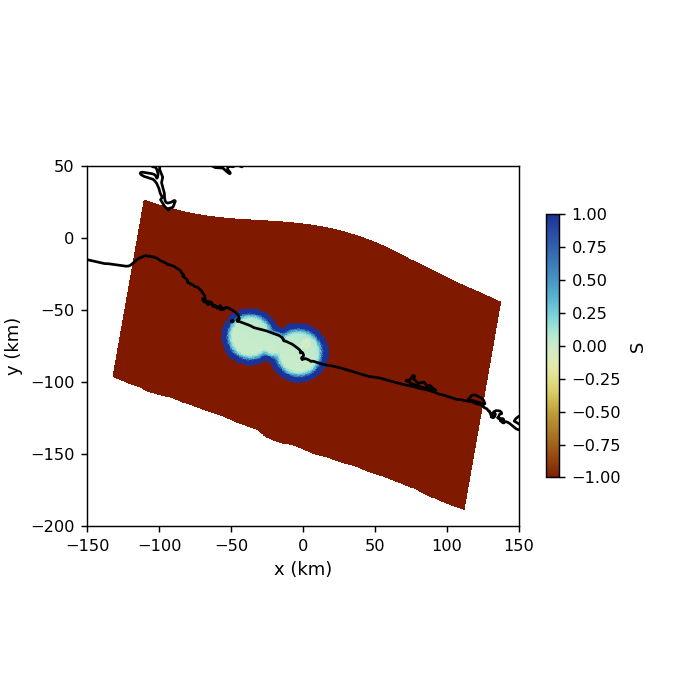

15061.671050828163
-30367.055550079738


In [40]:
fig,ax2 = plt.subplots(nrows=1,ncols=1,figsize=(3,3))

sc = ax2.tripcolor(triang,S,cmap=cm.roma,shading='flat',vmin=-1,vmax=1)
cl = fig.colorbar(sc,ax=ax2,shrink=0.5)
cl.set_label('S')

ax2.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax2.contour(X,Y,coslp,levels=[8,16],colors='w')
ax2.set_aspect(1)
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')

plt.show()
outname = modelname+'-S.png'
plt.savefig(outname,dpi=100,transparent=False)

print(np.max(S))
print(np.min(S))

In [83]:
## plot slip and rupture speed
# load data for snapshort
srd1= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=1,oneDtMem=True,firstElement=-1)
srd2= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=int(ndt/6),oneDtMem=True,firstElement=-1)
srd3= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=int(2*ndt/6),oneDtMem=True,firstElement=-1)
srd4 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=int(3*ndt/6),oneDtMem=True,firstElement=-1)
srd5= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=int(4*ndt/6),oneDtMem=True,firstElement=-1)
srd6 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=int(5*ndt/6),oneDtMem=True,firstElement=-1)

<IPython.core.display.Javascript object>


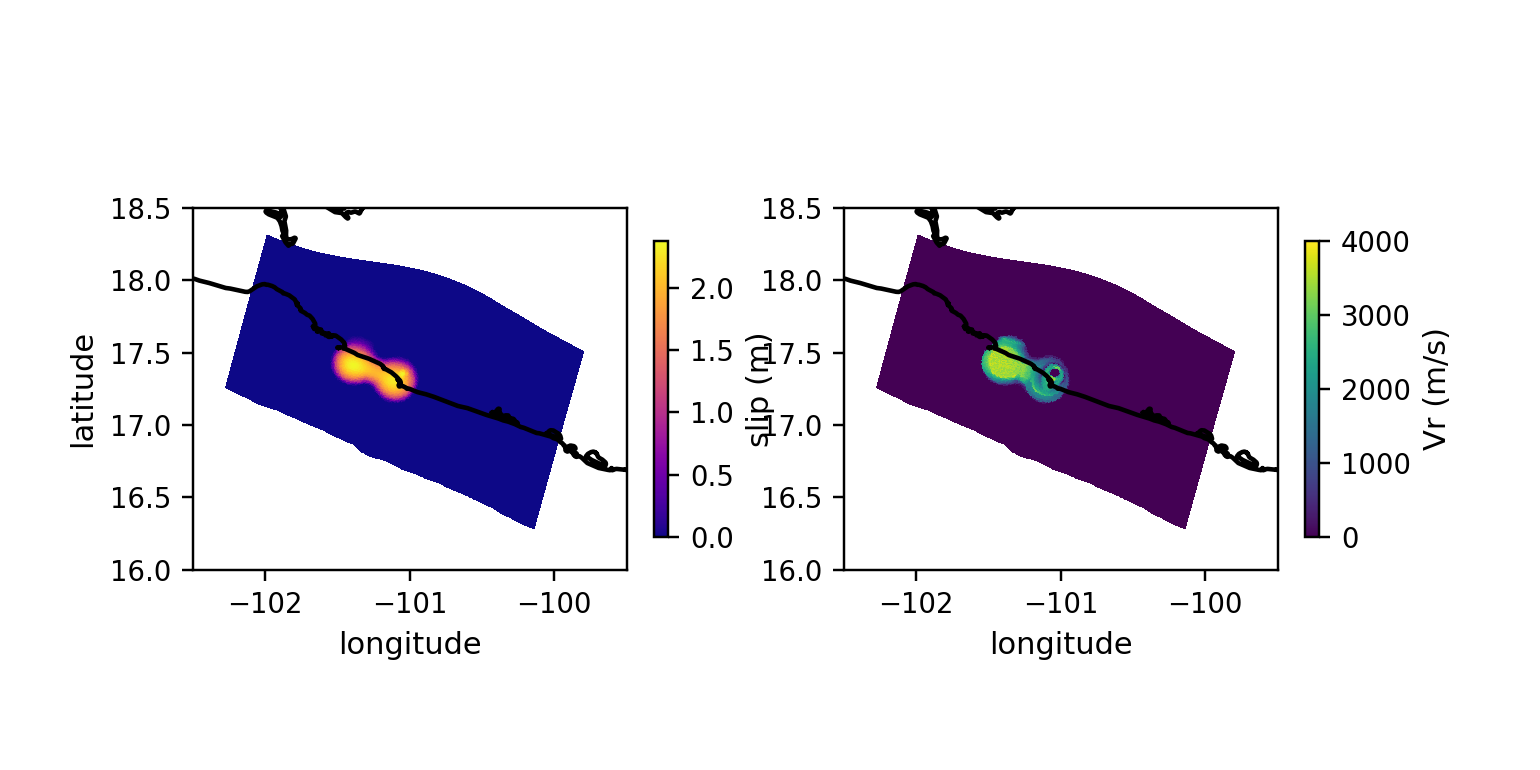

In [97]:
## plot slip and rupture speed
fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(7,3.5))

ax0.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')
ax0.set_aspect(1)
ax0.set_xlabel('longitude')
ax0.set_ylabel('latitude')

sc = ax0.tripcolor(triang,asl[0],cmap='plasma',shading='flat')
# ax0.plot(xepi,yepi,'*w',markersize=5)
# ax0.plot(xaft,yaft,'*b',markersize=8)
cl = fig.colorbar(sc,ax=ax0,shrink=0.5)
cl.set_label('slip (m)')

ax1.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax1.contour(X,Y,coslp,levels=[8,16],colors='w')
ax1.set_aspect(1)
ax1.set_xlabel('longitude')
# ax1.set_ylabel('y (km)')

#ax1.set_title('Mapview of Mud')
sc = ax1.tripcolor(triang,vr[0],cmap='viridis',shading='flat',vmin=0.0,vmax=4000.0)
cl = fig.colorbar(sc,ax=ax1,shrink=0.5)
cl.set_label('Vr (m/s)')

plt.show()
outname = modelname+'-slp-vr.png'
plt.savefig(outname,dpi=200,transparent=False)

<IPython.core.display.Javascript object>


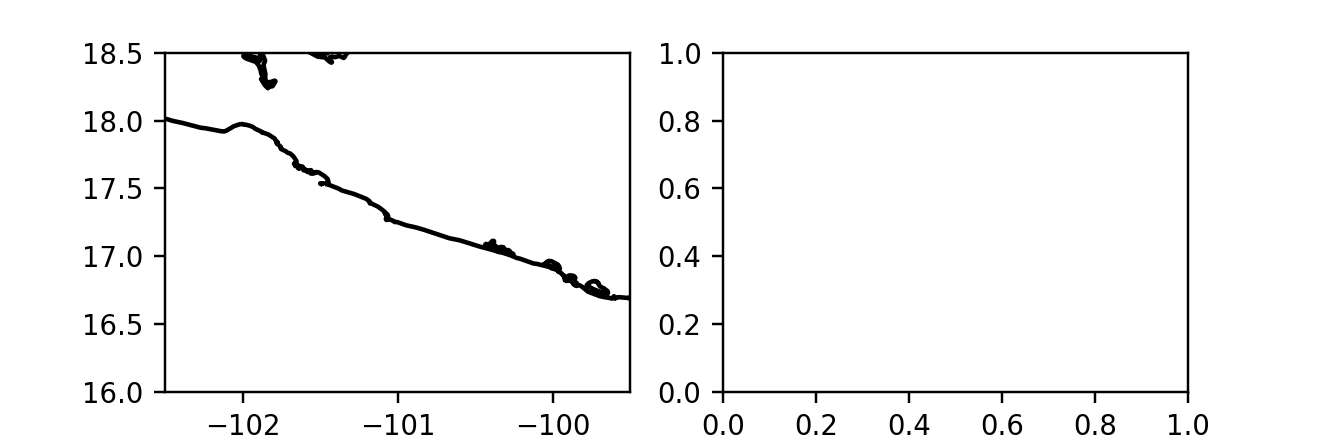

ValueError: Length of color values array must be the same as either the number of triangulation points or triangles

In [48]:
fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(6,2))

ax0.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
ax0.contour(X,Y,coslp,levels=[6,16],colors='w')

sc = ax0.tripcolor(triang,-td[0]/1e6,cmap='plasma',shading='flat',vmin=0,vmax=12)
c0 = fig.colorbar(sc,ax=ax0,shrink=0.75)
c0.set_label('stress drop (MPa)')

plt.show()
outname = modelname+'-sdrop.png'
plt.savefig(outname,dpi=100,transparent=False)

<IPython.core.display.Javascript object>


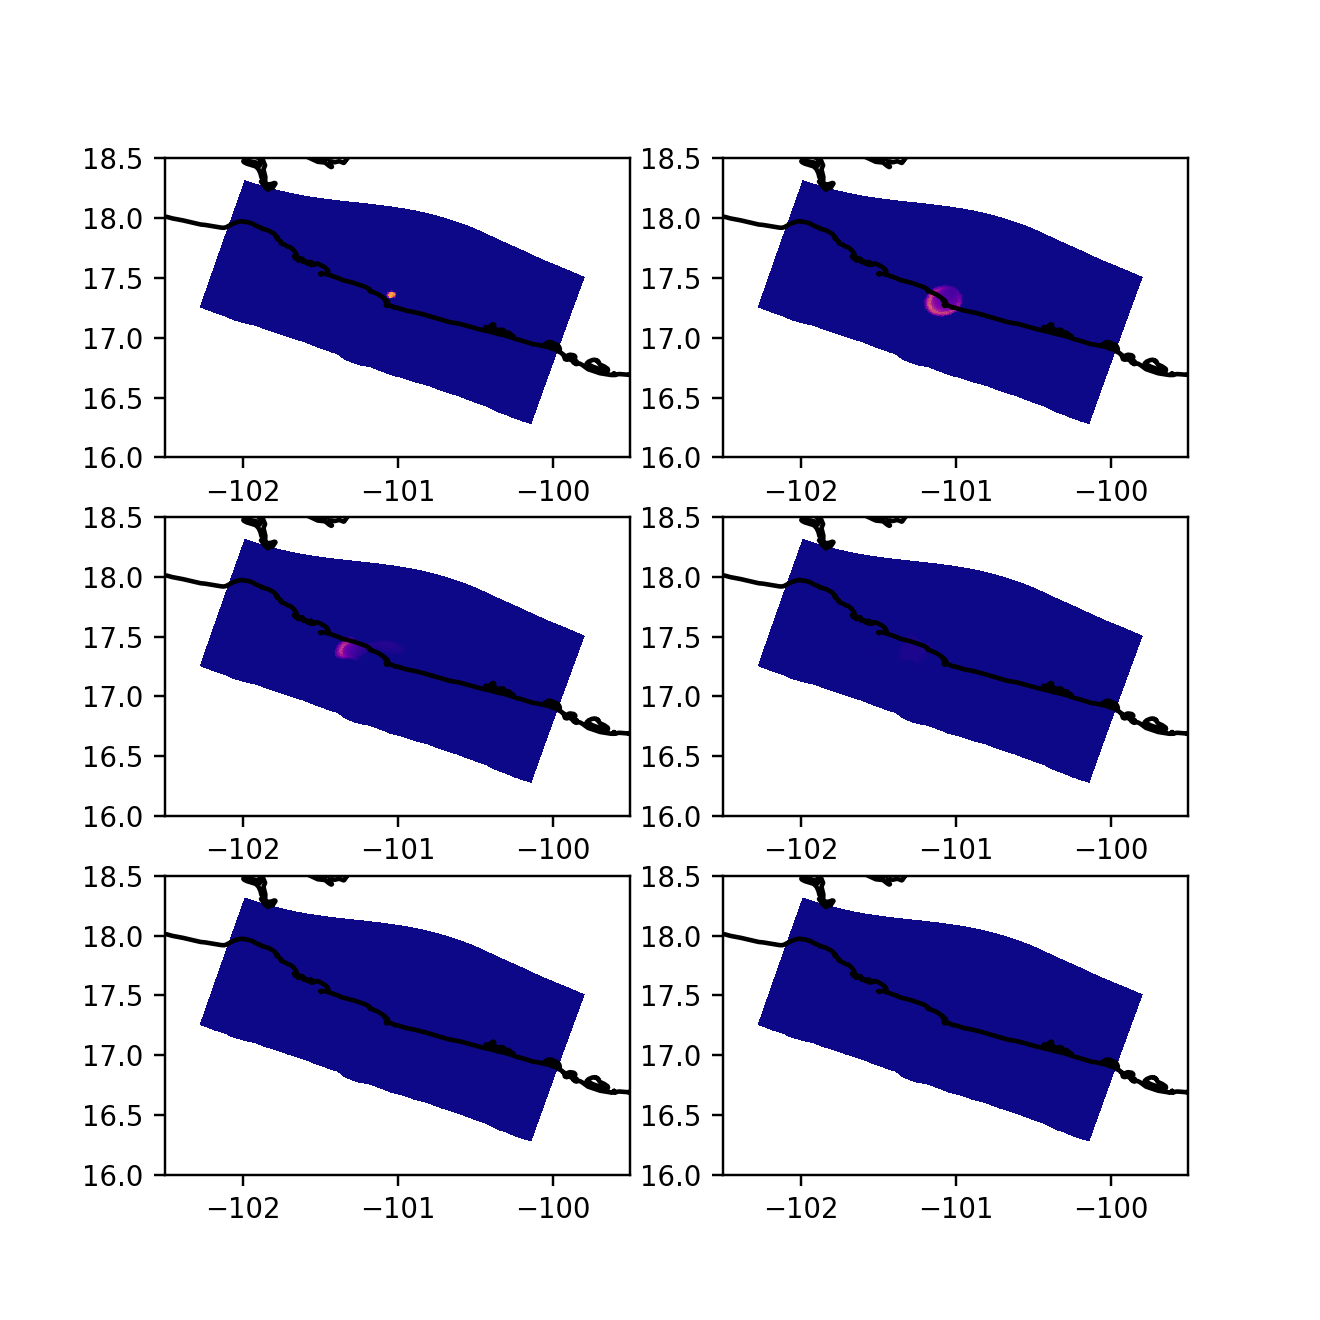

In [86]:
# plot snapshots of slip rate
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5]) = plt.subplots(nrows=3,ncols=2,figsize=(6,6))

sc = ax0.tripcolor(triang,srd1[0],cmap='plasma',shading='flat',vmin=0,vmax=1.2)
#cl = fig.colorbar(sc,ax=ax0)
ax0.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')

sc = ax1.tripcolor(triang,srd2[0],cmap='plasma',shading='flat',vmin=0,vmax=1.2)
#cl = fig.colorbar(sc,ax=ax1)
ax1.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')

sc = ax2.tripcolor(triang,srd3[0],cmap='plasma',shading='flat',vmin=0.0,vmax=1.2)
#cl = fig.colorbar(sc,ax=ax2)
ax2.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.contour(X,Y,coslp,levels=[8,16],colors='w')

sc = ax3.tripcolor(triang,srd4[0],cmap='plasma',shading='flat',vmin=0,vmax=1.2)
#cl = fig.colorbar(sc,ax=ax3)
ax3.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax3.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax3.contour(X,Y,coslp,levels=[8,16],colors='w')

sc = ax4.tripcolor(triang,srd5[0],cmap='plasma',shading='flat',vmin=0,vmax=1.2)
##cl = fig.colorbar(sc,ax=ax4)
ax4.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax4.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax4.contour(X,Y,coslp,levels=[8,16],colors='w')

sc = ax5.tripcolor(triang,srd6[0],cmap='plasma',shading='flat',vmin=0,vmax=1.2)
##cl = fig.colorbar(sc,ax=ax5)
cl.set_label('slip rate m/s')
ax5.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax5.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax5.contour(X,Y,coslp,levels=[8,16],colors='w')

plt.show()
outname = modelname+'-snapshots.png'
plt.savefig(outname,dpi=100,transparent=False)


In [89]:
# load GPS vectors
xdmfFilename= folder + modelname +'-surface.xdmf'
ndt = ReadNdt(xdmfFilename)
surfxyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

gpsfolder =  '/import/schreck-data/dli/Mexico/Launch_Seissol/smallslab/GPS/'
staxyz = np.loadtxt(gpsfolder +'/GPS_station2.txt')

surf = pyproj.transform(lla, myproj, surfxyz[:,0]+refer[0],surfxyz[:,1]+refer[1], surfxyz[:,1]-surfxyz[:,1], radians=False)

centers = np.zeros(connect.shape)
centers[:,0] = (surf[0][connect[:,0]] + surf[0][connect[:,1]] + surf[0][connect[:,2]])/3.
centers[:,1] = (surf[1][connect[:,0]] + surf[1][connect[:,1]] + surf[1][connect[:,2]])/3.
centers[:,2] = (surf[2][connect[:,0]] + surf[2][connect[:,1]] + surf[2][connect[:,2]])/3.

Receiver = np.array([-staxyz[:,0],staxyz[:,1],staxyz[:,1]-staxyz[:,1]])
Receiver = Receiver.transpose()

tree = spatial.KDTree(centers)
dist, ids = tree.query(Receiver)

fout =  open(gpsfolder+'/'+ modelname +'/GPS_xyz.txt','w')
fout1 = open(gpsfolder +'/'+ modelname + '/GPS_number.txt','w')

for k in range(0,staxyz[:,0].size):
        #newrec = find_nearest_vector(centers, rec)
        newrec = centers[ids[k]]
        fout.write("%f %f %f\n" %(newrec[0],newrec[1],newrec[2]))
        fout1.write("%d %f\n" %(ids[k],dist[k]))

fout.close()
fout1.close()

<ipython-input-89-94a569e2fa00>:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(lla, myproj, surfxyz[:,0]+refer[0],surfxyz[:,1]+refer[1], surfxyz[:,1]-surfxyz[:,1], radians=False)


In [90]:
## read surface deformation from surface output
sta = np.loadtxt(gpsfolder + modelname +'/GPS_number.txt')
sta = sta[:,0]
nsta = sta.size

vec = np.array([])
xyz = np.array([])

for ista in range(0,nsta):

    uu = LoadData(xdmfFilename,'U',1,idt=ndt-1,oneDtMem=True,firstElement=np.int(sta[ista]))
    vv = LoadData(xdmfFilename,'V',1,idt=ndt-1,oneDtMem=True,firstElement=np.int(sta[ista]))
    ww = LoadData(xdmfFilename,'W',1,idt=ndt-1,oneDtMem=True,firstElement=np.int(sta[ista]))
    slp1 = uu[0][0]
    slp2 = vv[0][0]
    slp3 = ww[0][0]
    vec = np.append(vec,[slp1,slp2,slp3])

np.savetxt(gpsfolder + modelname+'/GPS_vec.txt',vec)

model = np.loadtxt(gpsfolder + modelname +'/GPS_vec.txt')  ;
data = np.loadtxt(gpsfolder +'/GPS_station2.txt') ;
obv = np.loadtxt(gpsfolder+ '/GPS_data.txt');

obvx = -data[:,0]
obvy = data[:,1]

# load horizontal slip U
slp = LoadData(xdmfFilename,'W',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
triang = tri.Triangulation(surf[0],surf[1],connect)

print(np.max(slp[0]))

0.48765392093249377


<IPython.core.display.Javascript object>


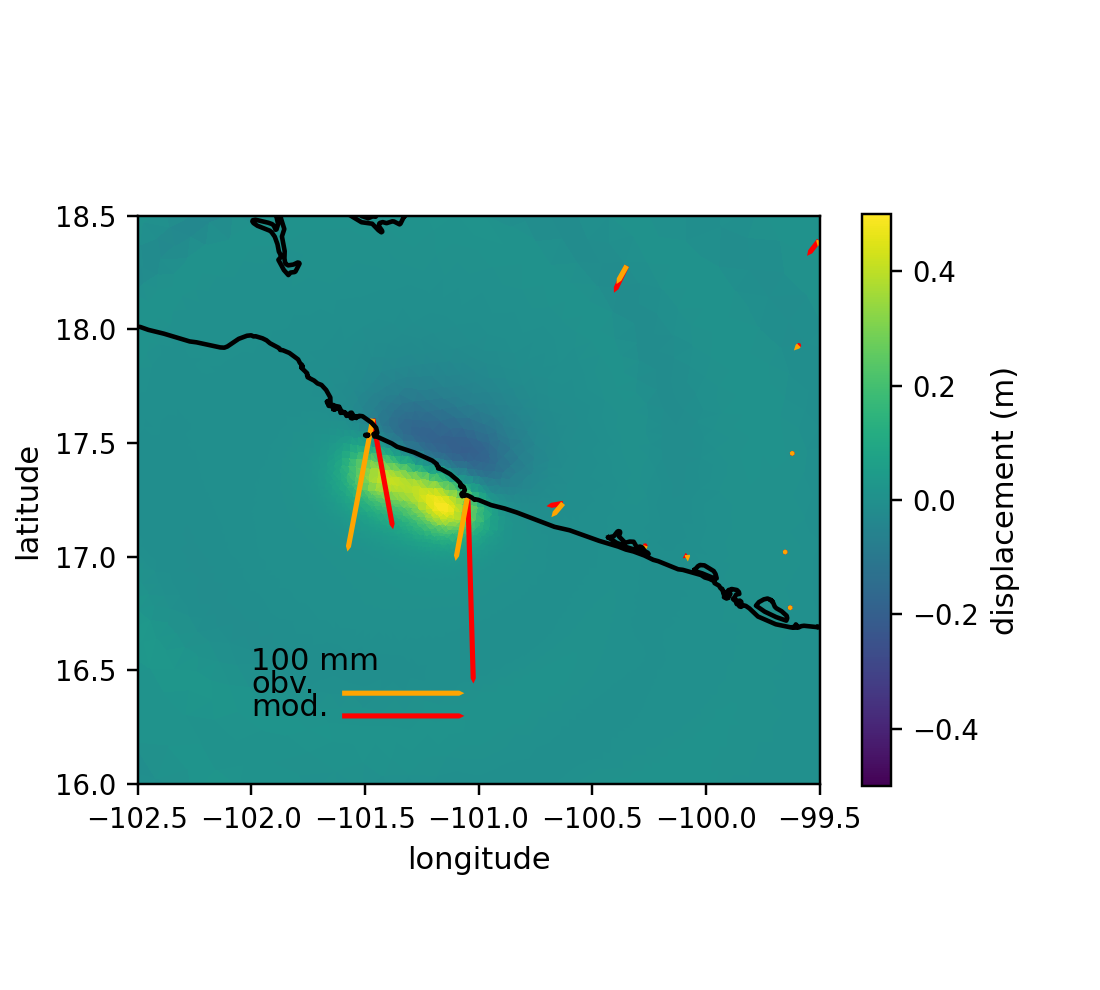

In [93]:
# plot GPS vector
# plot GPS comparison
fig,ax2 = plt.subplots(nrows=1,ncols=1,figsize=(5,4.5))

sc = ax2.tripcolor(triang,slp[0],cmap='viridis',shading='flat',vmin=-0.5,vmax=0.5)
cl = fig.colorbar(sc,ax=ax2,shrink=0.75)

cl.set_label('displacement (m)')
ax2.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)

ax2.quiver(np.append(obvx,-101.6),np.append(obvy,16.3),np.append(model[0::3]*1000,100),np.append(model[1::3]*1000,0),
           scale=180,scale_units='inches',color='red',headwidth=1,headlength=1)

ax2.quiver(np.append(obvx,-101.6),np.append(obvy,16.4),np.append(obv[:,1]*1000,100),np.append(obv[:,2]*1000,0),
           scale=180,scale_units='inches',color='orange',headwidth=1,headlength=1)
ax2.text(-102,16.5,'100 mm')
ax2.text(-102,16.3,'mod.')
ax2.text(-102,16.4,'obv.')

# ax2.contour(X,Y,coslp,levels=[12,16],colors='w',linewidths=0.50)

ax2.set_aspect(1)
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

plt.show()
outname = './'+ modelname +'-gps.png'
plt.savefig(outname,dpi=100,transparent=False)

In [43]:
print('finished')

finished


In [33]:
## plot fault locking model and CFS from SSE.
from netCDF4 import Dataset

fn1 = '/import/schreck-data/dli/Mexico/Launch_Seissol//Coulomb/lk20_h80_N25_T1/cfs_ep1_ct_new.nc'
fn1 = '/import/schreck-data/dli/Mexico/Launch_Seissol//Coulomb/lk20_h90_T2/cfs_ep6.nc'
fn2 = '/import/schreck-data/dli/Mexico/Launch_Seissol//Coulomb/FaultLocking/locking_model.nc'
fin1 = Dataset(fn1, 'r', format='NETCDF4')
fin2 = Dataset(fn2, 'r', format='NETCDF4')
x = fin1['x'][:]
y = fin1['y'][:]

data = fin1['data'][:]
s1 = data[1,:,:]
s1 = np.transpose(s1)
s1 = s1[:-1,:-1]
xc,yc = np.mgrid[slice(-150e3,150e3,300e3/x.size),
                  slice(-200e3,50e3,250e3/y.size)]

x2 = fin2['x'][:]
y2 = fin2['y'][:]
xc2,yc2 = np.mgrid[slice(-150e3,150e3,300e3/x2.size),
                  slice(-200e3,50e3,250e3/y2.size)]
data = fin2['data'][:]
s2 = data[1,:,:]
s2 = np.transpose(s2)
s2 = s2[:-1,:-1]

lonlatC = pyproj.transform(lla, myproj, xc+refer[0],yc+refer[1], xc-yc, radians=False)
lonlatC2 = pyproj.transform(lla, myproj, xc2+refer[0],yc2+refer[1], xc2-yc2, radians=False)

np.max(s1)
print(lonlatC2[0])

[[-102.50692833 -102.50582736 -102.50472528 ... -102.33288225
  -102.33161259 -102.33034175]
 [-102.4888014  -102.48769918 -102.48659584 ... -102.31455691
  -102.3132858  -102.31201351]
 [-102.47067608 -102.46957261 -102.46846801 ... -102.29623326
  -102.29496071 -102.29368698]
 ...
 [ -99.86047326  -99.85919366  -99.85791277 ...  -99.65824972
   -99.65677496  -99.65529883]
 [ -99.84260195  -99.84132119  -99.84003913 ...  -99.64019383
   -99.63871772  -99.63724025]
 [ -99.82473251  -99.82345058  -99.82216735 ...  -99.62213989
   -99.62066245  -99.61918363]]


<ipython-input-33-dfa80776c3ba>:28: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lonlatC = pyproj.transform(lla, myproj, xc+refer[0],yc+refer[1], xc-yc, radians=False)
<ipython-input-33-dfa80776c3ba>:29: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lonlatC2 = pyproj.transform(lla, myproj, xc2+refer[0],yc2+refer[1], xc2-yc2, radians=False)


<IPython.core.display.Javascript object>


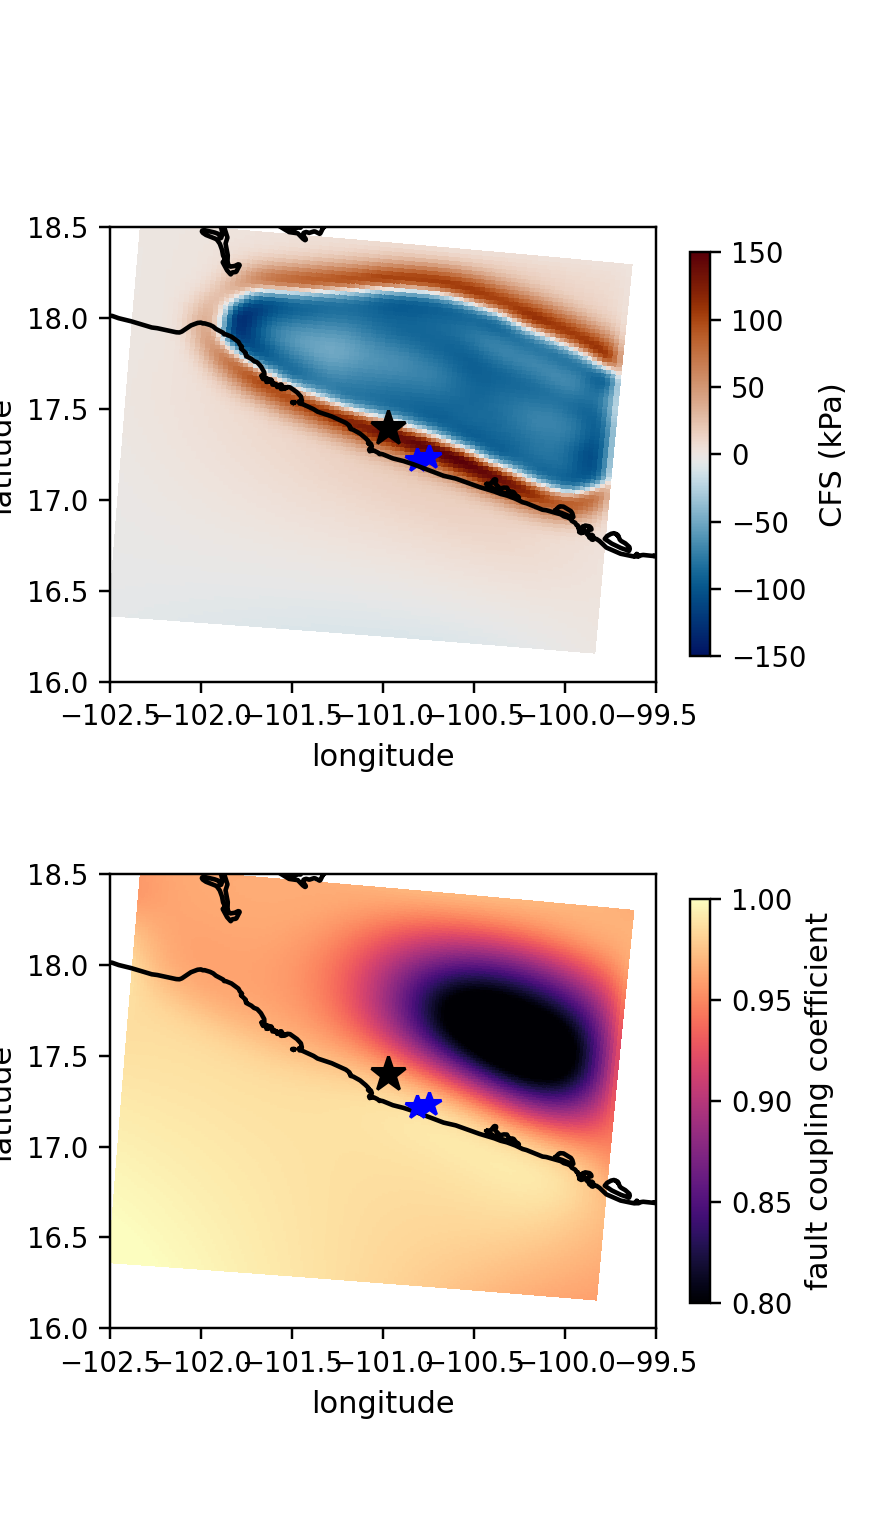

1.0029012


In [34]:
#%
fig,([ax0,ax1])=plt.subplots(nrows=2,ncols=1,figsize=(4,7))

sc = ax0.pcolormesh(lonlatC[0],lonlatC[1],s1/1e3,cmap=cm.vik,vmin=-150,vmax=150)
cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
cl.set_label('CFS (kPa)')

ax0.plot(epi[:,0],epi[:,1],'*k',markersize=12)
ax0.plot(aft[:,0],aft[:,1],'*b',markersize=8)
ax0.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)

ax0.set_aspect(1)
ax0.set_xlabel('longitude')
ax0.set_ylabel('latitude')

sc = ax1.pcolormesh(lonlatC2[0],lonlatC2[1],s2*0.402/0.4,cmap='magma',vmin=0.8,vmax=1.0)
cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
cl.set_label('fault coupling coefficient')

ax1.set(xlim=(-102.5, -99.5),ylim=(16,18.5))
ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
ax1.plot(epi[:,0],epi[:,1],'*k',markersize=12)
ax1.plot(aft[:,0],aft[:,1],'*b',markersize=8)

ax1.set_aspect(1)
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')

plt.show()
outname = 'Initial-cfs.png'
plt.savefig(outname,dpi=200,transparent=False)

print(np.max(s2*0.402/0.4))

In [119]:
1/0.9979117*0.4

0.4008370680492072

In [ ]:
# plot colorbar of snapshots of slip rate
fig,ax5 = plt.subplots(nrows=1,ncols=1,figsize=(4,3))

sc = ax5.tripcolor(triang,srd2[0],cmap='plasma',shading='flat',vmin=0,vmax=1.5)
cl = fig.colorbar(sc,ax=ax5)
cl.set_label('slip rate m/s')
ax5.set(xlim=( -80, 80),ylim=(-130,20))

plt.show()
outname = modelname+'-colorbar.eps'
plt.savefig(outname,dpi=100,transparent=False,format='eps')

In [ ]:
# plot profiles of initial parameter

depth = np.linspace(0.0, 60.0, num=120)
tn = depth-depth+1e6
ab = depth-depth+0.004
b = depth-depth+0.01
cc = depth-depth

for i in range(0,len(tn)):
    if(depth[i]<=4.0):
        tn[i]=1e6

    elif (depth[i]>4.0 and depth[i] <=10.0):
        tn[i]=(50e6-1e6)/(10 - 4)*(depth[i]-4)+ 1e6

    elif (depth[i]>10.0 and depth[i]<=20.0):
        tn[i]=50e6

    elif (depth[i]>20.0 and depth[i]<=21.0):
        tn[i]=(2.5e6-50e6)/(21 - 20)*(depth[i]-20)+ 50e6

    elif (depth[i]>21.0):
        tn[i]=2.5e6
        
for i in range(0,len(ab)):
    if(depth[i]<=8.0):
        ab[i]=(-0.004-0.004)/(8-0)*(depth[i]-0.0)+0.004

    elif (depth[i]>8.0 and depth[i] <=39.0):
        ab[i]=-0.004

    elif (depth[i]>39.0 and depth[i]<=50.0):
        ab[i]=(0.004+0.004)/(50-39)*(depth[i]-39.0)-0.004

    elif (depth[i]>50.0 and depth[i]<=60.0):
        ab[i]=(0.0045-0.004)/(60-50)*(depth[i]-50)+ 0.004

a = b- ab
        
## plot profiles
fig,([ax0,ax1]) = plt.subplots(nrows=1,ncols=2,figsize=(5,5))

ax0.plot(tn/1e6,-depth,'-k',label='normal stress')
#ax0.plot(0.4*tn/1e6,-depth,'-r')
ax0.set_ylabel('depth (km)')
ax0.set_xlabel('stress (MPa)')
ax0.legend()

ax1.plot(ab,-depth,'-k',label='a-b')
# ax1.plot(a,-depth,'-r',label='a')
# ax1.plot(b,-depth,'-b',label='b')
ax1.plot(cc,-depth,'--k')

# ax1.set_ylabel('depth (km)')
ax1.set_xlabel('(a-b)')
ax1.legend()

plt.show()
plt.savefig('ParProfile.eps',dpi=100)

In [ ]:
# The theoretical critical nucleation radius that permits spontaneous dynamic rupture to initiate in a 3-D linearly elastic and homogeneous media has been derived by Day (1982)

G=44e9
N=50e9
dc=0.7

rc = 7*np.pi*24*G*(S+1)*dc/N/0.2

fig,ax2 = plt.subplots(nrows=1,ncols=1,figsize=(4,3))

sc = ax2.tripcolor(triang,rc,cmap='viridis',shading='flat',vmin=0,vmax=3000)
cl = fig.colorbar(sc,ax=ax2,shrink=0.75)
cl.set_label('rc')

ax2.set(xlim=( -102.5, -99.5),ylim=(16,18.5))

plt.show()
# outname = modelname+'-S.png'
# plt.savefig(outname,dpi=100,transparent=False)
## radius of nucleation area using fracture energy


<IPython.core.display.Javascript object>


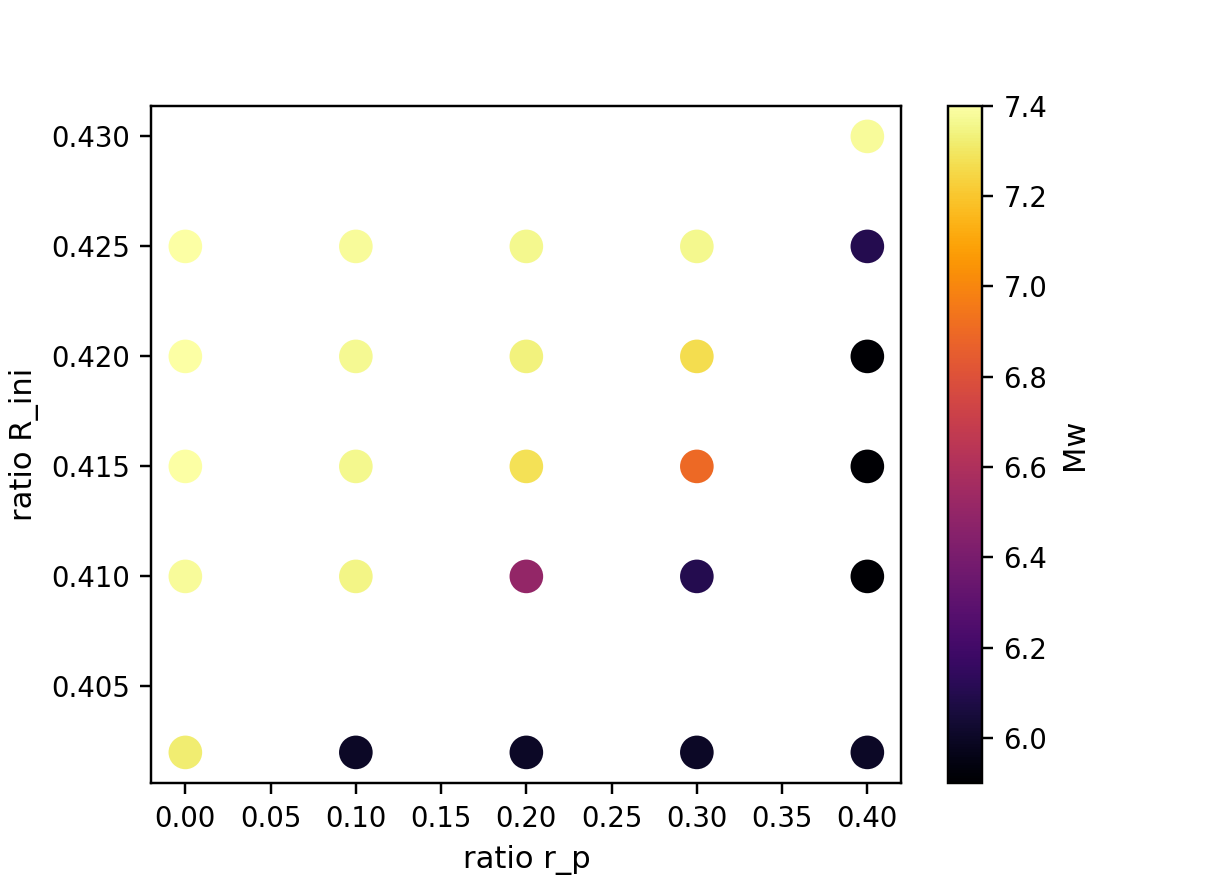

In [9]:
# exploration of r_p and R

data1 = np.loadtxt('data_r_p_R.txt')
# print(data1)

fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(5.5,4))
sc = ax1.scatter(data1[:,0],data1[:,1],s=100,c=data1[:,2],cmap='inferno',vmin=5.9,vmax=7.4)
cl = fig.colorbar(sc,ax=ax1)
cl.set_label('Mw')
ax1.set_xlabel('ratio r_p')
ax1.set_ylabel('ratio R_ini')

plt.show()
plt.savefig('fig_r_p_R.eps',dpi=100)

In [13]:
np.tan((90-98.7)/180*np.pi)

-0.15302150298122663

In [35]:
modelname = 'f519L'
xdmfFilename = 'GroundMotion/' + modelname + '-GME.xdmf'

ndt = ReadNdt(xdmfFilename)
surfxyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

surf = pyproj.transform(lla, myproj, surfxyz[:,0]+refer[0],surfxyz[:,1]+refer[1], surfxyz[:,1]-surfxyz[:,1], radians=False)

############# load GMPEs data  ##############
triang = tri.Triangulation(surf[0],surf[1],connect)

##%%
pga = LoadData(xdmfFilename,'PGA',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
pgd = LoadData(xdmfFilename,'PGD',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
sa = LoadData(xdmfFilename,'SA01.000s',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)

<ipython-input-35-b8f488933874>:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(lla, myproj, surfxyz[:,0]+refer[0],surfxyz[:,1]+refer[1], surfxyz[:,1]-surfxyz[:,1], radians=False)


<IPython.core.display.Javascript object>


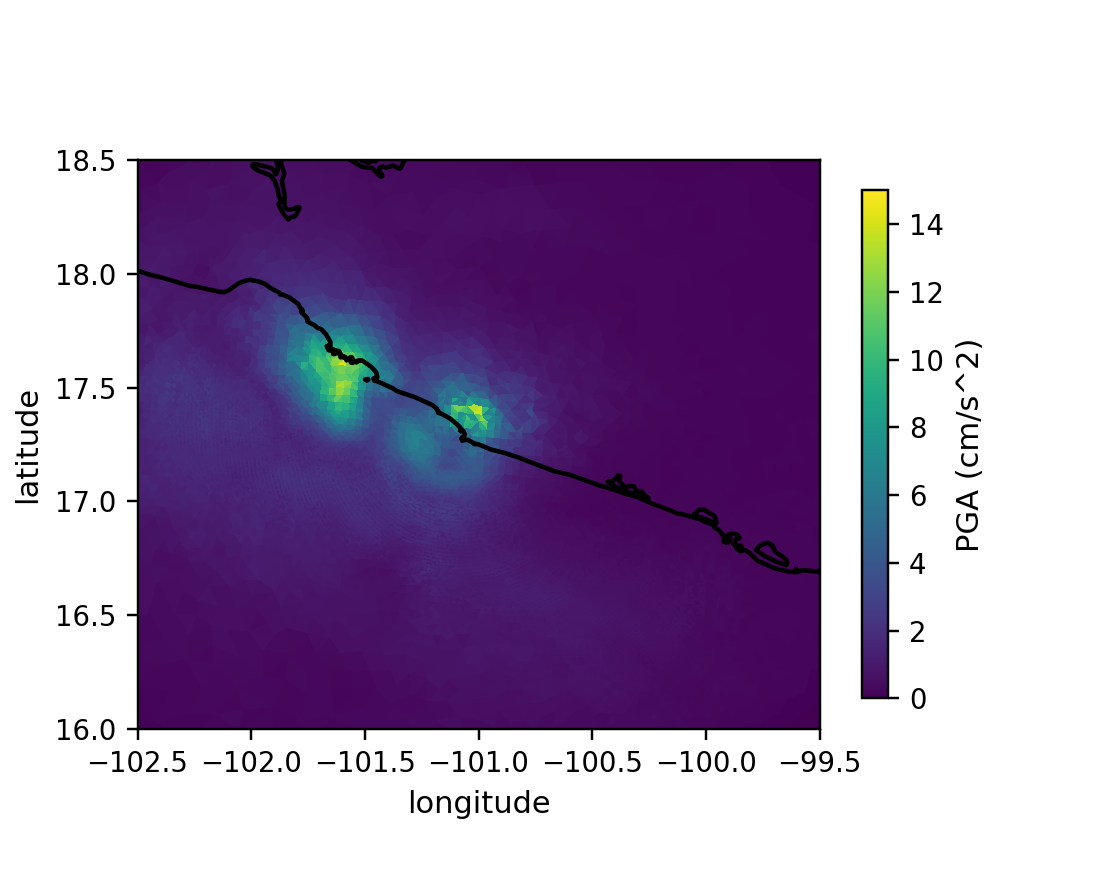

In [41]:
fig,ax2 = plt.subplots(nrows=1,ncols=1,figsize=(5,4))

sc = ax2.tripcolor(triang,pga[0]*100,cmap='viridis',shading='flat',vmin=-0.0,vmax=15)
cl = fig.colorbar(sc,ax=ax2,shrink=0.75)
cl.set_label('PGA (cm/s^2)')
ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)

ax2.set(xlim=( -102.5, -99.5),ylim=(16,18.5))
ax2.set_aspect(1)
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

plt.show()
outname = modelname+'-PGA.png'
plt.savefig(outname,dpi=100,transparent=False)